<a href="https://colab.research.google.com/github/PaolaMaribel18/pry-ml-2023A/blob/main/notebooks/08_softmaxClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8 Softmax Algorithm for Classification

The Softmax algorithm is a mathematical function that converts a vector of real numbers into a probability distribution. It is commonly used in machine learning and deep learning models to assign probabilities to multiple classes or categories.

The Softmax function takes an input vector of real numbers and transforms it into a probability distribution where each element represents the probability of the corresponding class. The output values are non-negative and sum up to 1, making it suitable for multi-class classification problems.

Mathematically, the Softmax function is defined as follows:
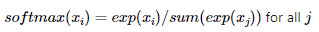
<br>
where *Xi*
 is the
-th element of the input vector
,
 *x, exp* denotes the exponential function, and the
 is taken over all elements of the vector.


##Exercise: Handwritten Digit Classification

In this exercise, you'll build a neural network model using **PyTorch to classify** handwritten digits from the Fashion-MNIST dataset.

Fashion-MNIST: Similar to MNIST, the Fashion-MNIST dataset consists of 28x28 grayscale images. However, instead of handwritten digits, it contains images of fashion items like clothing, shoes, and accessories. It serves as an alternative benchmark for image classification tasks.

###Step 1: Import the necessary libraries and load the dataset.



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Check if you can use your GPU



In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Let's inspect and see if our database works



100%|██████████| 26421880/26421880 [00:01<00:00, 16035436.24it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274357.15it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5017878.67it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5034338.31it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



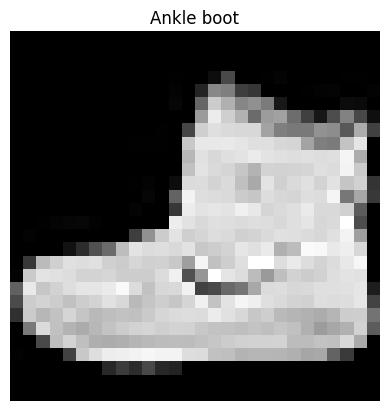

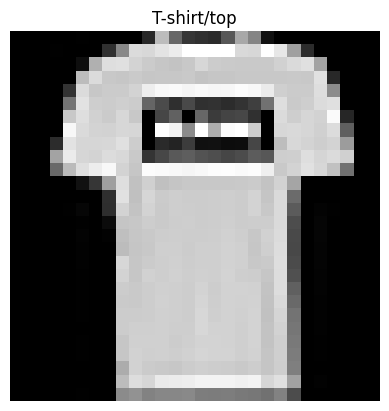

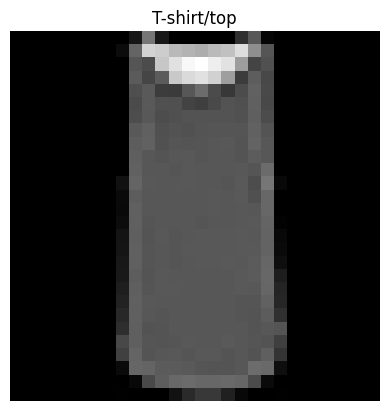

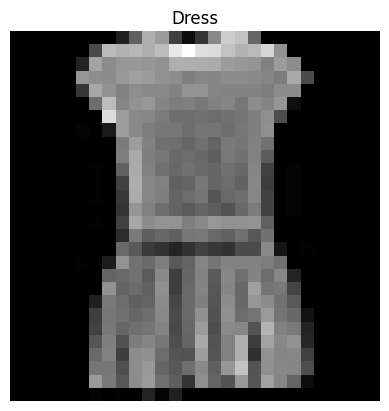

In [5]:
import matplotlib.pyplot as plt

#Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='../data', train=True, transform=transform, download=True)
# Define the class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize the first 4 images and labels
for i in range(4):
    image, label = train_dataset[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_labels[label])
    plt.axis('off')
    plt.show()

Now we create our loaders->pytorch



In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

# Define data loaders
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15823146.93it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270922.12it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5109043.08it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6309841.32it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



###Step 2: Define the neural network model.



In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc(x)
        return x

model = Net()

###Step 3: Define the loss function, optimizer, and training loop.

 The Softmax function is implicitly applied during the forward pass as part of the CrossEntropyLoss. The model is then trained using stochastic gradient descent (SGD) optimizer and evaluated on a separate test dataset.

In [8]:
criterion = nn.CrossEntropyLoss() #CrossEntropyLoss usa Softmax
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def train(model, train_loader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                    epoch+1, epochs, i+1, len(train_loader), running_loss / 100))
                running_loss = 0.0

train(model, train_loader, optimizer, criterion, epochs=5)

Epoch [1/5], Step [100/938], Loss: 1.0280
Epoch [1/5], Step [200/938], Loss: 0.6620
Epoch [1/5], Step [300/938], Loss: 0.6114
Epoch [1/5], Step [400/938], Loss: 0.5748
Epoch [1/5], Step [500/938], Loss: 0.5699
Epoch [1/5], Step [600/938], Loss: 0.5287
Epoch [1/5], Step [700/938], Loss: 0.5375
Epoch [1/5], Step [800/938], Loss: 0.5358
Epoch [1/5], Step [900/938], Loss: 0.5082
Epoch [2/5], Step [100/938], Loss: 0.4992
Epoch [2/5], Step [200/938], Loss: 0.4686
Epoch [2/5], Step [300/938], Loss: 0.4945
Epoch [2/5], Step [400/938], Loss: 0.4862
Epoch [2/5], Step [500/938], Loss: 0.4658
Epoch [2/5], Step [600/938], Loss: 0.4837
Epoch [2/5], Step [700/938], Loss: 0.4694
Epoch [2/5], Step [800/938], Loss: 0.4726
Epoch [2/5], Step [900/938], Loss: 0.4771
Epoch [3/5], Step [100/938], Loss: 0.4668
Epoch [3/5], Step [200/938], Loss: 0.4761
Epoch [3/5], Step [300/938], Loss: 0.4479
Epoch [3/5], Step [400/938], Loss: 0.4684
Epoch [3/5], Step [500/938], Loss: 0.4464
Epoch [3/5], Step [600/938], Loss:

###Step 4: Evaluate the trained model on the test dataset.



In [9]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy on the test set: {:.2f}%'.format(100 * correct / total))

test(model, test_loader)

Accuracy on the test set: 70.47%


In [10]:
# Set the model to evaluation mode
model.eval()

# Iterate through the test dataset and calculate the probabilities
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, dim=1)
        probabilities = nn.functional.softmax(outputs.data, dim=1)
        predicted_prob, predicted_label = torch.max(probabilities, dim=1)

        # Print the predicted probability and label
        print('Predicted Probability:', predicted_prob)
        print('Predicted Label:', predicted_label)
        print('Labels:', labels)
        break  # Stop after the first iteration

Predicted Probability: tensor([0.9952, 0.9978, 1.0000, 1.0000, 0.6859, 0.9998, 1.0000, 0.9728, 0.6319,
        1.0000, 0.9999, 0.8133, 0.6174, 1.0000, 1.0000, 0.9997, 0.9845, 0.9859,
        0.8168, 0.9999, 0.8571, 0.9974, 1.0000, 0.9992, 1.0000, 0.9223, 0.9729,
        0.9965, 0.9957, 0.7693, 0.5452, 0.9873, 1.0000, 1.0000, 0.9997, 0.9871,
        1.0000, 0.9888, 1.0000, 0.9591, 0.8453, 1.0000, 0.8201, 1.0000, 0.9385,
        0.9991, 0.9890, 0.9986, 0.9506, 0.6932, 0.9969, 0.9181, 0.8176, 0.9967,
        0.9013, 0.9998, 0.8927, 0.9963, 0.5443, 0.9976, 1.0000, 1.0000, 0.9762,
        0.9985])
Predicted Label: tensor([7, 2, 1, 1, 4, 1, 4, 4, 7, 7, 4, 5, 5, 3, 4, 1, 2, 4, 5, 0, 2, 7, 7, 7,
        1, 4, 4, 3, 7, 4, 8, 3, 3, 3, 5, 0, 7, 5, 7, 9, 0, 1, 4, 7, 4, 7, 2, 1,
        4, 6, 4, 4, 7, 6, 4, 2, 8, 4, 7, 0, 7, 7, 7, 5])
Labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1

NOTE: Softmax is a classification algorithm where the classification label is accompanied by a probability.

In this case, for each classification there are 10 probabilities and the highest probability is retained.

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, dim=1)
        probabilities = nn.functional.softmax(outputs.data, dim=1)
        predicted_prob, predicted_label = torch.max(probabilities, dim=1)

        # Print the predicted probability and label
        print('Predicted Probability:', predicted_prob)
        print('Predicted Label:', predicted_label)
        print('Labels:', labels)


        break  # Stop after the first iteration


Predicted Probability: tensor([0.9952, 0.9978, 1.0000, 1.0000, 0.6859, 0.9998, 1.0000, 0.9728, 0.6319,
        1.0000, 0.9999, 0.8133, 0.6174, 1.0000, 1.0000, 0.9997, 0.9845, 0.9859,
        0.8168, 0.9999, 0.8571, 0.9974, 1.0000, 0.9992, 1.0000, 0.9223, 0.9729,
        0.9965, 0.9957, 0.7693, 0.5452, 0.9873, 1.0000, 1.0000, 0.9997, 0.9871,
        1.0000, 0.9888, 1.0000, 0.9591, 0.8453, 1.0000, 0.8201, 1.0000, 0.9385,
        0.9991, 0.9890, 0.9986, 0.9506, 0.6932, 0.9969, 0.9181, 0.8176, 0.9967,
        0.9013, 0.9998, 0.8927, 0.9963, 0.5443, 0.9976, 1.0000, 1.0000, 0.9762,
        0.9985])
Predicted Label: tensor([7, 2, 1, 1, 4, 1, 4, 4, 7, 7, 4, 5, 5, 3, 4, 1, 2, 4, 5, 0, 2, 7, 7, 7,
        1, 4, 4, 3, 7, 4, 8, 3, 3, 3, 5, 0, 7, 5, 7, 9, 0, 1, 4, 7, 4, 7, 2, 1,
        4, 6, 4, 4, 7, 6, 4, 2, 8, 4, 7, 0, 7, 7, 7, 5])
Labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1

<Figure size 1000x1000 with 0 Axes>

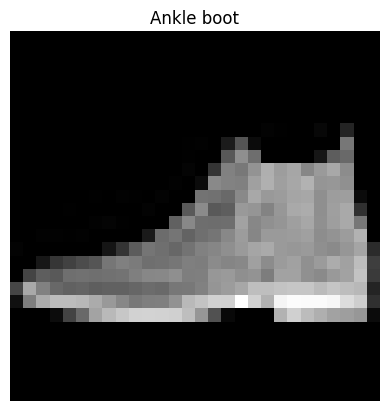

In [11]:
image, label = test_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_labels[label])
plt.axis('off')
plt.show()

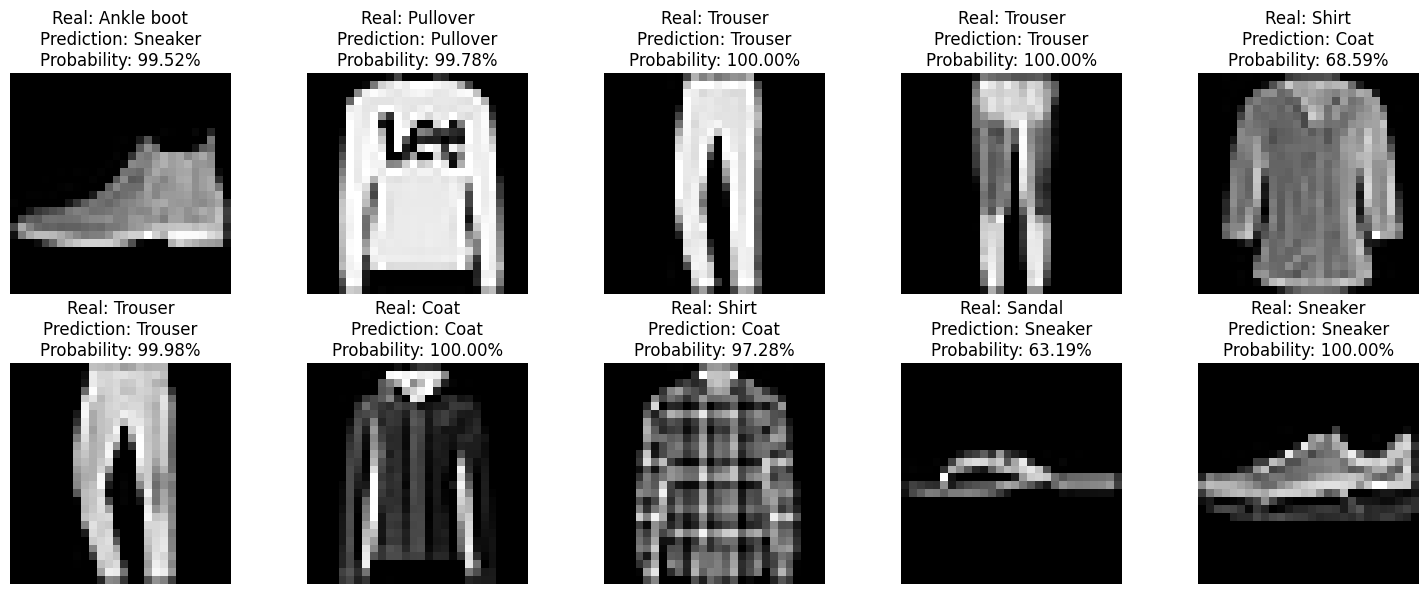

In [36]:
import matplotlib.pyplot as plt

# Get multiple predictions
num_predictions = 10  # Number of predictions you want to print
rows = 2  # Number of rows in the subplot grid
cols = 5  # Number of columns in the subplot grid

# Create subplots to display predictions in a grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

for i in range(num_predictions):
    image, label = test_dataset[i]
    row = i // cols  # Calculate the row index
    col = i % cols  # Calculate the column index

    axes[row, col].imshow(image.squeeze(), cmap='gray')
    axes[row, col].axis('off')

    # Make the prediction
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        probabilities = nn.functional.softmax(output, dim=1)
        predicted_prob, predicted_label = torch.max(probabilities, dim=1)

    # Show the real label and the prediction with its probability
    real_label = class_labels[label]
    prediction_name = class_labels[predicted_label.item()]
    prediction_prob = predicted_prob.item() * 100

    axes[row, col].set_title(f'Real: {real_label}\nPrediction: {prediction_name}\nProbability: {prediction_prob:.2f}%')

plt.tight_layout()
plt.show()
